Let $U\left( {x,y} \right)$ a differentiable utility function,
$\mathbb{R}^2 \to \mathbb{R}$, $x\ge0$ and $y\ge0$,
it is monotonicly increasing in both $x$ and $y$,
and concave in both $x$ and $y$ for any value of $y$ and $x$.

Consider a ${\left. {y\left( x \right)} \right|_{{u_0}}}$ curve at a given $U = u_0$.
Prove that
$${\left. {\frac{{dy}}{{dx}}} \right|_{{u_0},{x_0}}} =  - \frac{{{{\left. {\frac{{\partial U}}{{\partial x}}} \right|}_{{x_0}}}}}{{{{\left. {\frac{{\partial U}}{{\partial y}}} \right|}_{{y_0}}}}}$$
where $y_0 = y\left( x_0 \right)$.

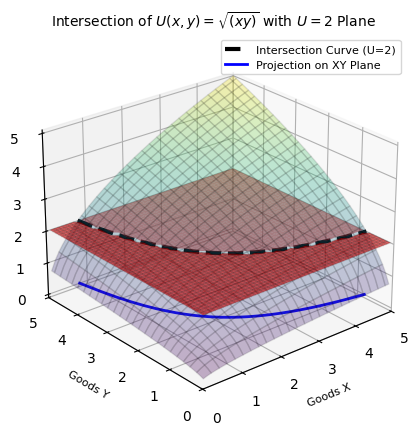

In [24]:
import numpy as np
import matplotlib.pyplot as plt

U_0 = 2
def utility_function(x, y):
    return np.sqrt(x * y)
x = np.linspace(0.1, 5, 50)  # Avoid zero to prevent sqrt issues
y = np.linspace(0.1, 5, 50)
X, Y = np.meshgrid(x, y)
Z = utility_function(X, Y)

# Create a figure for the 3D plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

# Split the plane into two using masks
plane_below = np.where(Z > U_0, U_0, np.nan)  # Plane below utility
plane_above = np.where(Z < U_0, U_0, np.nan)  # Plane above utility

# Plot the lower part of the plane (below the utility surface)
ax.plot_surface(X, Y, plane_below, color='red', alpha=0.5)

# Plot the utility surface
ax.plot_surface(X, Y, Z, cmap='viridis', ec=(0,0,0,0.1), alpha=0.3, rstride=2, cstride=2)

# Plot the upper part of the plane (above the utility surface)
ax.plot_surface(X, Y, plane_above, color='red', ec=(0,0,0,0.1), alpha=0.6)

# Adjust grid line frequency without changing interpolation points
ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Reduce number of grid lines on X-axis
ax.yaxis.set_major_locator(plt.MaxNLocator(5))  # Reduce number of grid lines on Y-axis
ax.zaxis.set_major_locator(plt.MaxNLocator(5))  # Reduce number of grid lines on Z-axis


# Compute the intersection curve: sqrt(xy) = U_0 -> y = U_0^2 / x
y_intersect = (U_0**2) / x

# Plot the intersection curve
# filter the intersection till y max
y_intersect[y_intersect > 5] = np.nan
ax.plot(x, y_intersect, U_0, color='black', linewidth=3, linestyle='dashed', label=f'Intersection Curve (U={U_0})')

# Plot the projection of the intersection on the XY-plane
ax.plot(x, y_intersect, 0, color='blue', linewidth=2, linestyle='solid', label='Projection on XY Plane')

# Adjust viewing angle for better visualization
ax.view_init(elev=25, azim=230)

# Labels and title
ax.set_xlabel("Goods X", fontsize=8)
ax.set_ylabel("Goods Y", fontsize=8)
ax.set_zlabel("Utility U(X, Y)", fontsize=8)
ax.set_title(f"Intersection of $U(x, y) = \\sqrt{{(xy)}}$ with $U = {U_0}$ Plane", fontsize=10)
# Display the plot

ax.legend(fontsize=8)
plt.show()
